In [1]:
%matplotlib inline
%load_ext line_profiler
import numpy as np
import scipy as sp
import scipy.sparse as spar
import scipy.special as spec
import sys
from matplotlib import pyplot as plt
from lda import LDA, _doc_update, _slice_doc_update
from sklearn.decomposition import LatentDirichletAllocation as SKLDA

import pickle
import cProfile

In [14]:
from data.datafile import AADataFile
dfile = pickle.load(open("data/datafile.pkl"))

In [15]:
dt = dfile.DT
te = dfile.TE

In [16]:
f = te.toarray().argmax(axis=1)

In [ ]:
lda = LDA(K=30, n_jobs=8, nr_em_epochs=20)
%time b_uni, g_uni = lda.fit(dt)

In [ ]:
vocab = dfile.vocabulary

In [32]:
lookup = lambda x : [k[0] for k in vocab if k[1] == x]

def topic_summaries(b, K=10):
    bs = b.argsort()[:,-50:]
    for i in range(K):
        print "Topic", i
        words = []
        for j in range(bs.shape[1]):
            words.append(str(lookup(bs[i,j])[0]))
        print " ".join(words)

In [ ]:
topic_summaries(b_uni, K=30)

# Multimodal Starts Here!

In [ ]:
lda = LDA(K=30, n_jobs=8, nr_em_epochs=20)
%time b, g, e = lda.fit(dt, f)

In [ ]:
topic_summaries(b, K=30)

In [ ]:
from sklearn.metrics import adjusted_rand_score as ARI, adjusted_mutual_info_score as AMI

In [ ]:
unimodal = np.argmax(g_uni, 0)
multimodal = np.argmax(g, 0)

In [ ]:
cat = dfile.categories

In [ ]:
print "Unimodal Rand: ", ARI(unimodal, cat)
print "Multimodal Rand: ", ARI(multimodal, cat)


print "Unimodal Adj MI: ", AMI(unimodal, cat)
print "Multimodal Adj MI: ", AMI(multimodal, cat)

## Experiments

## Setup

In [2]:
from data.datafile import AADataFile
dfile = pickle.load(open("data/datafile.pkl"))
dt = dfile.DT
te = dfile.TE
f = te.toarray().argmax(axis=1)

### 1. Convergence and Perplexity
We show the update procedure converges. That is, $\sqrt[N]{\frac{1}{P(W)}}$ (for both the unimodal and multimodal cases) decreases, and converges as we iterate

In [5]:
lda = LDA(K=30, n_jobs=8, nr_em_epochs=20)
mm_perp, b_mm, g_mm, e_mm = lda.fit(dt, f)

lda = LDA(K=10, n_jobs=8, nr_em_epochs=20)
uni_perp, b_uni, g_uni = lda.fit(dt)


Epoch: 0
Perplexity: 1.65609452211
Epoch: 1
Perplexity: 360.171726337
Epoch: 2
Perplexity: 354.59339887
Epoch: 3
Perplexity: 307.382043936
Epoch: 4
Perplexity: 281.748181741
Epoch: 5
Perplexity: 269.181185668
Epoch: 6
Perplexity: 262.873051763
Epoch: 7
Perplexity: 259.717174434
Epoch: 8
Perplexity: 257.682934096
Epoch: 9
Perplexity: 256.118540305
Epoch: 10
Perplexity: 254.785654766
Epoch: 11
Perplexity: 253.607120407
Epoch: 12
Perplexity: 252.601235254
Epoch: 13
Perplexity: 251.655823357
Epoch: 14
Perplexity: 250.832610885
Epoch: 15
Perplexity: 250.170706584
Epoch: 16
Perplexity: 249.548016014
Epoch: 17
Perplexity: 249.039615415
Epoch: 18
Perplexity: 248.539463178
Epoch: 19
Perplexity: 248.123270083
Epoch: 0
Perplexity: 1.62876712358
Epoch: 1
Perplexity: 322.871010508
Epoch: 2
Perplexity: 292.084209451
Epoch: 3
Perplexity: 270.357730717
Epoch: 4
Perplexity: 256.183129849
Epoch: 5
Perplexity: 247.46281754
Epoch: 6
Perplexity: 242.367019397
Epoch: 7
Perplexity: 239.058231026
Epoch: 8
Per

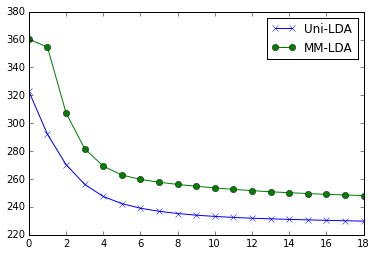

In [12]:
x = np.arange(0, 19)
uni, = plt.plot(x, uni_perp, "-x", label="Uni-LDA")
mm, = plt.plot(x, mm_perp, "-o", label="MM-LDA")
plt.legend(handles=[uni, mm])

### 2. Clustering Evaluation
We evaluate the clustering quality using ARI and AMI against real categories, with different choices of number of topics. Notice that as we increase the number of topics, Multi modal LDA gives better results

In [4]:
from sklearn.metrics import adjusted_rand_score as ARI, adjusted_mutual_info_score as AMI

cat = dfile.categories

uni_aris = []
mm_aris = []

uni_amis = []
mm_amis = []

for K in [10, 20, 30]:
    lda = LDA(K=K, n_jobs=8, nr_em_epochs=20)
    mm_perp, b_mm, g_mm, e_mm = lda.fit(dt, f)

    lda = LDA(K=K, n_jobs=8, nr_em_epochs=20)
    uni_perp, b_uni, g_uni = lda.fit(dt)
    
    unimodal = np.argmax(g_uni, 0)
    multimodal = np.argmax(g_mm, 0)
    
    uni_aris.append(ARI(unimodal, cat))
    uni_amis.append(AMI(unimodal, cat))
    
    mm_aris.append(ARI(multimodal, cat))
    mm_amis.append(AMI(multimodal, cat))
    

Epoch: 0
Perplexity: 1.67574084351
Epoch: 1
Perplexity: 360.644590921
Epoch: 2
Perplexity: 358.130049362
Epoch: 3
Perplexity: 350.809177754
Epoch: 4
Perplexity: 331.009505358
Epoch: 5
Perplexity: 320.412288339
Epoch: 6
Perplexity: 313.636752991
Epoch: 7
Perplexity: 308.399943645
Epoch: 8
Perplexity: 304.63368173
Epoch: 9
Perplexity: 302.180386527
Epoch: 10
Perplexity: 300.607385646
Epoch: 11
Perplexity: 299.34134043
Epoch: 12
Perplexity: 298.371048649
Epoch: 13
Perplexity: 297.504932956
Epoch: 14
Perplexity: 296.703137916
Epoch: 15
Perplexity: 296.055757049
Epoch: 16
Perplexity: 295.494451679
Epoch: 17
Perplexity: 294.998447756
Epoch: 18
Perplexity: 294.535223028
Epoch: 19
Perplexity: 294.111306192
Epoch: 0
Perplexity: 1.64456764042
Epoch: 1
Perplexity: 324.615758956
Epoch: 2
Perplexity: 295.756465555
Epoch: 3
Perplexity: 275.598325254
Epoch: 4
Perplexity: 262.92799104
Epoch: 5
Perplexity: 254.638604214
Epoch: 6
Perplexity: 249.376239459
Epoch: 7
Perplexity: 245.735565546
Epoch: 8
Perp

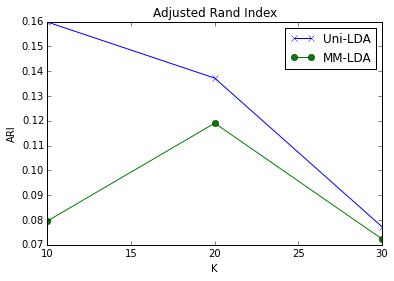

In [8]:
x = [10, 20, 30]
uni, = plt.plot(x, uni_aris, "-x", label="Uni-LDA")
mm, = plt.plot(x, mm_aris, "-o", label="MM-LDA")
plt.legend(handles=[uni, mm])
plt.xlabel("K")
plt.ylabel("ARI")
plt.title("Adjusted Rand Index")
plt.show()

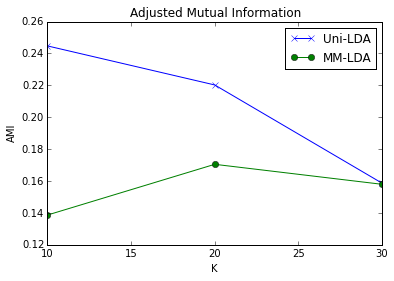

In [9]:
uni, = plt.plot(x, uni_amis, "-x", label="Uni-LDA")
mm, = plt.plot(x, mm_amis, "-o", label="MM-LDA")
plt.legend(handles=[uni, mm])
plt.xlabel("K")
plt.ylabel("AMI")
plt.title("Adjusted Mutual Information")
plt.show()

### 3. Topic Examples
Enjoy the topics as distributions over words (top 50 shown). As a by-product, in the multi modal case, we can also explore the topics as distributions over etymological roots

In [34]:
lookup_word = lambda x : [k[0] for k in vocab if k[1] == x]
lookup_etym = lambda x : [etym_vocab[x]]

vocab = dfile.vocabulary
etym_vocab = dfile.etym_classes

def topic_summaries(fn, b, K=10, top=50):
    bs = b.argsort()[:,-top:]
    for i in range(K):
        print "Topic", i
        words = []
        for j in range(bs.shape[1]):
            word = str(fn(bs[i,j])[0]) if 
            words.append(str(fn(bs[i,j])[0]))
        print " ".join(words)
    

In [18]:
#Use the best K1 here
K1 = 10
lda = LDA(K=K1, n_jobs=8, nr_em_epochs=20)
uni_perp, b_uni, g_uni = lda.fit(dt)

topic_summaries(lookup_word, b_uni, K=K1)

Epoch: 0
Perplexity: 1.62834215727
Epoch: 1
Perplexity: 323.375329189
Epoch: 2
Perplexity: 291.221758749
Epoch: 3
Perplexity: 269.153268809
Epoch: 4
Perplexity: 256.396163009
Epoch: 5
Perplexity: 248.957566628
Epoch: 6
Perplexity: 244.077863693
Epoch: 7
Perplexity: 240.645953667
Epoch: 8
Perplexity: 238.178898982
Epoch: 9
Perplexity: 236.368332883
Epoch: 10
Perplexity: 234.941086262
Epoch: 11
Perplexity: 233.875682664
Epoch: 12
Perplexity: 233.038417706
Epoch: 13
Perplexity: 232.336397669
Epoch: 14
Perplexity: 231.727806292
Epoch: 15
Perplexity: 231.199758043
Epoch: 16
Perplexity: 230.733651723
Epoch: 17
Perplexity: 230.295613545
Epoch: 18
Perplexity: 229.917592116
Epoch: 19
Perplexity: 229.594184582
Topic 0
nun ak anlatan tarafından nın önemli olan kaydetti hiçbir parti bütün belirten belirterek görmez kullandı şekilde genel erdoğan türk muhabir değil şunları islam ın devam açıklamada zaman başbakan bizim yıl yeni dile aa davutoğlu muhabirine etti büyük ifade var eden nin başkanı her 

In [20]:
#Use the best K2 here
K2 = 30
lda = LDA(K=K2, n_jobs=8, nr_em_epochs=20)
mm_perp, b_mm, g_mm, e_mm = lda.fit(dt, f)

topic_summaries(lookup_word, b_mm, K=K2)

Epoch: 0
Perplexity: 1.66865143723
Epoch: 1
Perplexity: 361.092792028
Epoch: 2
Perplexity: 356.736166733
Epoch: 3
Perplexity: 321.547120054
Epoch: 4
Perplexity: 304.457363598
Epoch: 5
Perplexity: 291.871135577
Epoch: 6
Perplexity: 282.705388347
Epoch: 7
Perplexity: 276.983544544
Epoch: 8
Perplexity: 273.347867291
Epoch: 9
Perplexity: 270.86139101
Epoch: 10
Perplexity: 269.097396765
Epoch: 11
Perplexity: 267.885632196
Epoch: 12
Perplexity: 266.766933349
Epoch: 13
Perplexity: 265.776863995
Epoch: 14
Perplexity: 265.033171486
Epoch: 15
Perplexity: 264.319993887
Epoch: 16
Perplexity: 263.461286647
Epoch: 17
Perplexity: 262.712324982
Epoch: 18
Perplexity: 261.835161895
Epoch: 19
Perplexity: 260.999536442
Topic 0
sahada sıfırın dikkati rakip takip sanayi iptal afet kırmızılı fark farklı tahmin zaman kaybetti hizmet derece müdürü aynı ali emniyet hasar itfaiye müdürlüğü müdahale inşaat merkezi belediyesi vatandaşların devlet kaydetti galibiyet fiyatı dakika fazla beyazlı caddesi acil mücadele

In [35]:
print etym_vocab
topic_summaries(lookup_etym, e_mm, K=K2, top=3)

[None u'' u'Arap\xe7a' u'Fars\xe7a' u'Frans\u0131zca' u'T\xfcrk\xe7e'
 u'Yunanca' u'\u0130ngilizce' u'\u0130talyanca']
Topic 0


UnicodeEncodeError: 'ascii' codec can't encode character u'\xfc' in position 1: ordinal not in range(128)